<a href="https://colab.research.google.com/github/Ahsrah-09/RK-Technologies/blob/main/RK_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [38]:
data = pd.read_csv('churn_data_simple.csv')

In [39]:
data.head()

,Unnamed: 0,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,...,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,days_since_last_transaction,doy_lst_tran,woy_lst_tran,moy_lst_tran,dow_lst_tran
0,0,1,2101,66,1,0.0,3,187.0,2,755.0,...,0.20,0.20,1458.71,1458.71,0,632,141.0,21.0,5.0,1.0
1,1,2,2348,35,1,0.0,3,1020.0,2,3214.0,...,5486.27,100.56,6496.78,8787.61,0,468,305.0,44.0,11.0,4.0
2,3,5,2329,90,1,0.0,3,1020.0,2,582.0,...,0.47,2143.33,2291.91,1669.79,1,555,218.0,32.0,8.0,1.0
3,4,6,1579,42,1,2.0,3,1494.0,3,388.0,...,588.62,1538.06,1157.15,1677.16,1,466,307.0,44.0,11.0,6.0
4,5,7,1923,42,0,0.0,3,1096.0,2,1666.0,...,857.50,286.07,15719.44,15349.75,0,468,305.0,44.0,11.0,4.0


In [40]:
data.churn.value_counts(normalize=True)

0    0.802814
1    0.197186
Name: churn, dtype: float64

**Separating dependent and independent** **variables**

In [41]:
X = data.drop(columns=['churn','Unnamed: 0','customer_id'])
Y = data['churn']

**Scaling the dataset**

In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

**Splitting the dataset**

In [43]:
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(scaled_X, Y, train_size = 0.80, random_state=42)
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((20127, 23), (5032, 23), (20127,), (5032,))

**Model Building, Random Forest**

In [44]:
from sklearn.ensemble import RandomForestClassifier as RFC
forest = RFC()
forest.fit(X_train,y_train)

RandomForestClassifier()

**Checking the performance of the model**

In [45]:
from sklearn.metrics import classification_report
predicted_values = forest.predict(X_train)
print(classification_report(y_train,predicted_values))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16169
           1       1.00      1.00      1.00      3958

    accuracy                           1.00     20127
   macro avg       1.00      1.00      1.00     20127
weighted avg       1.00      1.00      1.00     20127



In [46]:
predicted_values = forest.predict(X_test)
print(classification_report(y_test,predicted_values))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      4029
           1       0.71      0.44      0.54      1003

    accuracy                           0.85      5032
   macro avg       0.79      0.70      0.73      5032
weighted avg       0.84      0.85      0.84      5032



In [47]:
from sklearn.metrics import f1_score
def calc_score(model, x1, y1, x2, y2):
      model.fit(x1,y1)
      predict = model.predict(x1)
      f1 = f1_score(y1, predict)
      predict = model.predict(x2)
      f2 = f1_score(y2, predict)
      return f1, f2

In [48]:
def effect(train_score, test_score, x_axis, title):
    plt.figure(figsize = (7,4), dpi = 120)
    plt.plot(x_axis, train_score, color = 'red', label = 'train_Score')
    plt.plot(x_axis, test_score, color = 'blue', label = 'test_Score')
    plt.title(title)
    plt.legend()
    plt.xlabel("parameter_value")
    plt.ylabel("f1 score")
    plt.show()


In [13]:
estimators = [i for i in range(1,600,10)]
train = []
test = []

for i in estimators:
    model = RFC(class_weight = 'balanced_subsample',
              n_estimators = i,
              n_jobs = -1,
              random_state = 101)
    f1, f2 = calc_score(model, X_train, y_train, X_test, y_test)
    train.append(f1)
    test.append(f2)

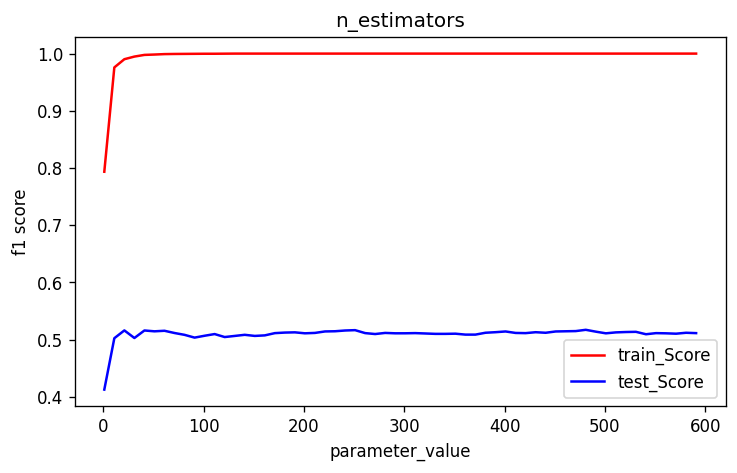

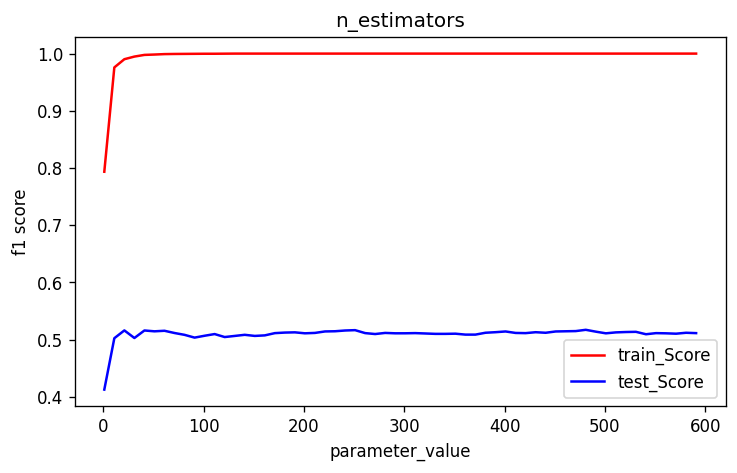

In [14]:
effect(train,test,range(1,600,10),'n_estimators')

In [15]:
maxfeatures = range(1,X.shape[1])
train = []
test = []

for i in maxfeatures:
    model = RFC(class_weight = 'balanced_subsample', n_estimators = 51, max_samples=0.5,
              n_jobs = -1, random_state = 101, max_features = i)
    f1, f2 = calc_score(model, X_train, y_train, X_test, y_test)
    train.append(f1)
    test.append(f2)

In [ ]:
effect( train, test, maxfeatures , 'number of max features for individual tree')

In [ ]:
diff = [i-j for i,j in zip(train,test)]
max_features_df = pd.DataFrame({'max_features':maxfeatures,
                                'Train_Score':train,
                                'Test_Score':test,
                                'Difference':diff})
max_features_df.iloc[5:20]

In [ ]:
len(X.columns)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start=45,stop=60,num=10)]
max_features = [4,8,12,16]
max_samples = [float(x) for x in np.linspace(0.04,0.4,num=50)]
max_depth = [int(x) for x in np.linspace(5,20,num=5)]
max_depth.append(None)
min_samples_split=[int(x) for x in np.linspace(2,500,15)]
min_samples_leaf = [int(x) for x in np.linspace(1,500,20)]
bootstrap = [True,False]

random_grid = {'n_estimators':n_estimators,
               'max_samples':max_samples,
               'max_features':max_features,
               'max_depth':max_depth,
               'min_samples_split':min_samples_split,
               'min_samples_leaf':min_samples_leaf,
               'bootstrap':bootstrap}
from pprint import pprint
pprint(random_grid)

**Random Search Training**

In [20]:
forest = RFC()
forest_random = RandomizedSearchCV(estimator=forest,
                                   param_distributions=random_grid,
                                   n_iter=80,
                                   cv=3,
                                   verbose=2,
                                   random_state=42,
                                   n_jobs=-1)

forest_random.fit(X_train,y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=80,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 8, 12, 16, 20, None],
                                        'max_features': [4, 8, 12, 16],
                                        'max_samples': [0.04,
                                                        0.0473469387755102,
                                                        0.05469387755102041,
                                                        0.062040816326530614,
                                                        0.06938775510204082,
                                                        0.07673469387755102,
                                                        0.08408163265306123,
                                                        0.09142857142857144,
                                                        0.0987...
                                                        0.22367346938775512,
                                                        0.23102040816326533,
                                                        0.23836734693877554,
                                                        0.24571428571428575,
                                                        0.2530612244897959, ...],
                                        'min_samples_leaf': [1, 27, 53, 79, 106,
                                                             132, 158, 184, 211,
                                                             237, 263, 289, 316,
                                                             342, 368, 394, 421,
                                                             447, 473, 500],
                                        'min_samples_split': [2, 37, 73, 108,
                                                              144, 179, 215,
                                                              251, 286, 322,
                                                              357, 393, 428,
                                                              464, 500],
                                        'n_estimators': [45, 46, 48, 50, 51, 53,
                                                         55, 56, 58, 60]},
                   random_state=42, verbose=2)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=80,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 8, 12, 16, 20, None],
                                        'max_features': [4, 8, 12, 16],
                                        'max_samples': [0.04,
                                                        0.0473469387755102,
                                                        0.05469387755102041,
                                                        0.062040816326530614,
                                                        0.06938775510204082,
                                                        0.07673469387755102,
                                                        0.08408163265306123,
                                                        0.09142857142857144,
                                                        0.0987...
                                                        0.22367346938775512,
                                                        0.23102040816326533,
                                                        0.23836734693877554,
                                                        0.24571428571428575,
                                                        0.2530612244897959, ...],
                                        'min_samples_leaf': [1, 27, 53, 79, 106,
                                                             132, 158, 184, 211,
                                                             237, 263, 289, 316,
                                                             342, 368, 394, 421,
                                                             447, 473, 500],
                                        'min_samples_split': [2, 37, 73, 108,
                                                              144, 179, 215,
                                                              251, 286, 322,
                                                              357, 393, 428,
                                                              464, 500],
                                        'n_estimators': [45, 46, 48, 50, 51, 53,
                                                         55, 56, 58, 60]},
                   random_state=42, verbose=2)

In [21]:
forest_random.best_params_

{'n_estimators': 58,
 'min_samples_split': 73,
 'min_samples_leaf': 27,
 'max_samples': 0.23102040816326533,
 'max_features': 16,
 'max_depth': 5,
 'bootstrap': True}

In [22]:
base_forest = RFC(n_estimators = 10, random_state=42)
base_forest.fit(X_train,y_train)

from sklearn.metrics import classification_report
pred = base_forest.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.86      0.95      0.91      4029
           1       0.68      0.39      0.50      1003

    accuracy                           0.84      5032
   macro avg       0.77      0.67      0.70      5032
weighted avg       0.83      0.84      0.82      5032

              precision    recall  f1-score   support

           0       0.86      0.95      0.91      4029
           1       0.68      0.39      0.50      1003

    accuracy                           0.84      5032
   macro avg       0.77      0.67      0.70      5032
weighted avg       0.83      0.84      0.82      5032



In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

In [24]:
best_forest = forest_random.best_estimator_
pred = best_forest.predict(X_test)
print(classification_report(y_test,pred))
accuracy_score(y_test,pred)

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      4029
           1       0.71      0.38      0.50      1003

    accuracy                           0.85      5032
   macro avg       0.79      0.67      0.70      5032
weighted avg       0.83      0.85      0.83      5032

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      4029
           1       0.71      0.38      0.50      1003

    accuracy                           0.85      5032
   macro avg       0.79      0.67      0.70      5032
weighted avg       0.83      0.85      0.83      5032



0.8457869634340223

0.8457869634340223